# Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read the Data

In [2]:
df = pd.read_csv('House_price_prediction.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# EDA and Preprocessing

In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Drop columns which is less important to reduce dimensionality 
df.drop(['hotwaterheating'],axis=1,inplace=True)

In [6]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,0,no,furnished


In [7]:
df = pd.get_dummies(df, columns = ['mainroad','guestroom','basement','airconditioning','prefarea'],
                    drop_first = True )
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,furnished,True,False,False,True,True
1,12250000,8960,4,4,4,3,furnished,True,False,False,True,False
2,12250000,9960,3,2,2,2,semi-furnished,True,False,True,False,True
3,12215000,7500,4,2,2,3,furnished,True,False,True,True,True
4,11410000,7420,4,1,2,2,furnished,True,True,True,True,False


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lb = LabelEncoder()
df['furnishingstatus'] = lb.fit_transform(df['furnishingstatus'])

In [10]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_yes,guestroom_yes,basement_yes,airconditioning_yes,prefarea_yes
0,13300000,7420,4,2,3,2,0,True,False,False,True,True
1,12250000,8960,4,4,4,3,0,True,False,False,True,False
2,12250000,9960,3,2,2,2,1,True,False,True,False,True
3,12215000,7500,4,2,2,3,0,True,False,True,True,True
4,11410000,7420,4,1,2,2,0,True,True,True,True,False


In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,2.000000


<Axes: >

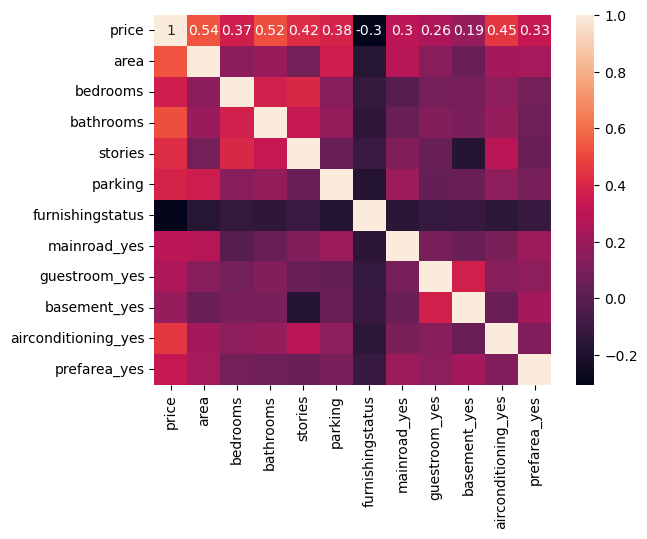

In [12]:
sns.heatmap(df.corr(), annot = True)

# Spliting the Data 

In [13]:
x = df.drop('price', axis=1)
y = df['price']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model Building

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [18]:
np.mean(mse)

-1108947143510.2913

In [19]:
model.score(x_train,y_train)

0.6770417745902914

# Prediction

In [20]:
y_pred = model.predict(x_test)

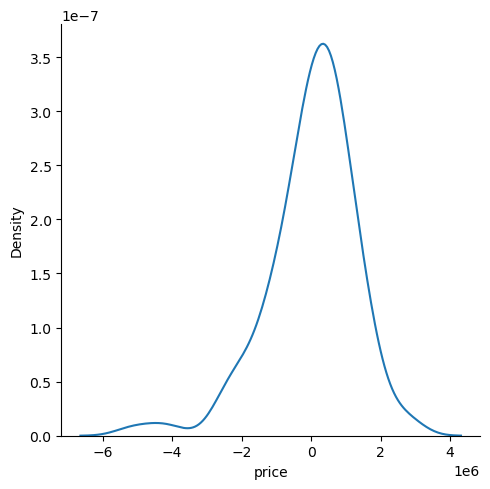

In [21]:
sns.displot(y_pred-y_test,kind='kde')

In [22]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.6494252907415361

# Random Forest

In [272]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [273]:
regressor.score(x_train,y_train)

0.9515858947076338

In [274]:
regressor_pred = regressor.predict(x_test)
regressor_pred

array([ 5407990.        ,  7220710.        ,  3814860.        ,
        4535510.        ,  4199195.        ,  3649170.        ,
        5224100.        ,  5563145.        ,  2560880.        ,
        2994995.5       , 10002300.        ,  3341298.33333333,
        3106366.66666667,  3458350.        ,  3610547.5       ,
        3976863.33333333,  3247200.83333333,  5022010.        ,
        4171230.        ,  4297020.        ,  5456570.        ,
        5892110.        ,  2959337.5       ,  3986500.        ,
        5255320.        ,  6630639.4       ,  3313520.        ,
        4887960.        ,  6579580.        ,  3240860.        ,
        5835795.        ,  3247650.        ,  6883100.        ,
        4386480.        ,  3004015.        ,  6046950.        ,
        5510890.        ,  3575740.        ,  3076780.        ,
        4471565.        ,  4468170.        ,  2938506.66666667,
        7339290.        ,  4346720.        ,  4074560.        ,
        4294570.        ,  7106639.4    

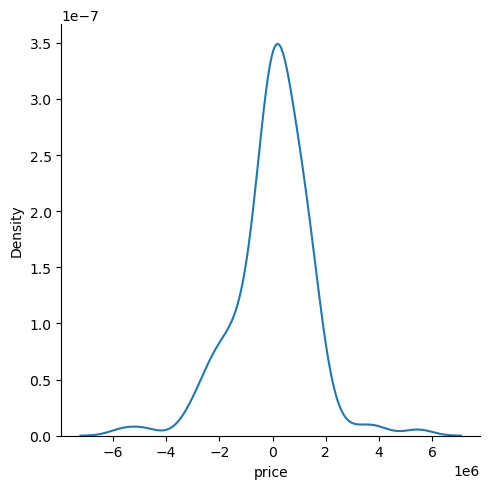

In [275]:
sns.displot(regressor_pred-y_test,kind='kde')

In [279]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,regressor_pred)
score1

0.5577261782767888